# 91

In [ ]:
# 런타임 20초 소요
!pip install transformers

# 위키피디아 설치
!pip install wikipedia
import wikipedia

# 키워드 설정
keyword = "Moderna"
# 위키피디아 언어 설정
wikipedia.set_lang("en")

# 키워드 검색 및 출력
search_response = wikipedia.search(keyword)
print(search_response)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=7fa6cc97602f5441f199b0242d981a129d10f8e199909ee650bb940e824cb990
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia
['Moderna', 'Studio Moderna', 'Moderna COVID-19 vaccine', 'Devotio Moderna', 'Moderna University', 'T-72', 'Moderna Museet Malmö', 'Moderna Museet', 'Melissa J. Moore', 'Moderna tider']


#92

In [ ]:
# search_response에 담긴 세번째 원소(인덱스 2에 해당하는 원소) 출력
search_response[2]

'Moderna COVID-19 vaccine'

In [ ]:
# search_response의 세번째 원소를 키워드로 위키피디아 검색
moderna_text_t = wikipedia.page(search_response[2])
type(moderna_text_t)

wikipedia.wikipedia.WikipediaPage

In [ ]:
# 추가 코딩. moderna_text 출력
moderna_text_t

<WikipediaPage 'Moderna COVID-19 vaccine'>

In [ ]:
# search_response 두번째 요소를 키워드로 위키피디아 검색 및 본문(content) 출력
moderna_text = wikipedia.page(search_response[2]).content
moderna_text

'The Moderna COVID‑19 vaccine (INN: elasomeran), sold under the brand name Spikevax, is a COVID-19 vaccine developed by American company Moderna, the United States National Institute of Allergy and Infectious Diseases (NIAID), and the Biomedical Advanced Research and Development Authority (BARDA). Depending on the jurisdiction, it is authorized for use in people aged six months, twelve years, or eighteen years and older. It provides protection against COVID-19 which is caused by infection by the SARS-CoV-2 virus. It is designed to be administered as two or three 0.5 mL doses given by intramuscular injection at an interval of at least 28 days apart.It is an mRNA vaccine composed of nucleoside-modified mRNA (modRNA) encoding a spike protein of SARS-CoV-2, which is encapsulated in lipid nanoparticles.It is authorized for use at some level in many countries.In August and September 2022, bivalent versions of the vaccine (Moderna COVID-19 Vaccine, Bivalent) containing elasomeran/elasomeran 0

# 93

In [ ]:
# 코딩 해석은 문제 91과 92 참조
keyword = "PFizer"

wikipedia.set_lang("en")
search_response = wikipedia.search(keyword)
print(search_response)

pfizer_text = wikipedia.page(search_response[1]).content


['Pfizer', 'Pfizer–BioNTech COVID-19 vaccine', 'Charles Pfizer', 'Pfizer (disambiguation)', 'Nirmatrelvir/ritonavir', 'Albert Bourla', 'Sildenafil', 'Operation Warp Speed', 'Abdullahi v. Pfizer, Inc.', 'Zoetis']


# 94

In [ ]:
# 문제 91의 트랜스포머스 라이브러리 미설치 시 재설치
!pip install transformers

# 95

In [ ]:
from transformers import pipeline, AutoTokenizer

# 파이프라인 설정
get_feature = pipeline('feature-extraction', model='bert-base-uncased', tokenizer='bert-base-uncased')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


#96

In [ ]:
sample_word = "vaccine"
# sample_word를 파이프라인을 인스턴스화한 get_feature에 투입
hidden_state = get_feature(sample_word)

import numpy as np
# hidden_state를 넘파이로 변경 후 차원 확인
np.array(hidden_state).shape


(1, 3, 768)

# 97

In [ ]:
# 토크나이저 불러오기
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# sample_word를 토크나이징한 결과의 input_ids를 디코딩
print(tokenizer.decode(tokenizer(sample_word)['input_ids']))


[CLS] vaccine [SEP]


# 98

In [ ]:
# get_cls_vector 함수 정의
def get_cls_vector(sample_text):

  hidden_state = get_feature(sample_text, padding=True, truncation=True, max_length=512)

  # hidden_state를 넘파이 어레이 타입으로 바꾸고 첫번째 행의 첫번째 열 요소를 변수 cls_vec에 저장
  cls_vec = np.array(hidden_state)[0, 0]
  return cls_vec

# 입력 텍스트 줄이 바뀔 때마다 분리 후 저장
ml = moderna_text.split("\n")
pfzl = pfizer_text.split("\n")

# 입력 텍스트 중에 공백은 제거
ml = [text for text in ml if text != '']
pfzl = [text for text in pfzl if text != '']


#99

In [ ]:
# 런타임 50초 소요
# ml 및 pfzl에 담긴 텍스트를 get_cls_vector 함수에 입력 후 그 결과를 넘파이 어레이로 변환
moderna_vecs = np.array([get_cls_vector(text) for text in ml])
pfizer_vecs = np.array([get_cls_vector(text) for text in pfzl])

# moderna_vecs 및 pfizer_vecs 차원 확인
print(moderna_vecs.shape)
print(pfizer_vecs.shape)


(69, 768)
(78, 768)


#100

In [ ]:
# 빈 컨테이너 딕셔너리 생성
pfizer_dics = {}

# for 반복문 중첩을 pfzl에 적용
for text in pfzl:
  # text를 토크나이징한 결과 단어를 하나씩 for 반복 루프 실행
  for token in tokenizer.tokenize(text):

    # token 길이가 5보다 크면 아래 구문 실행
    if len(token) > 5:
      # pfizer_dicsd의 키(key)에 token이 없는 경우
      if token not in pfizer_dics:
        # pfizer_dics 딕셔너리에 키(key)를 token으로, 키값(value)을 1로 설정
        pfizer_dics[token] = 1

      # pfizer_dicsd의 키(key)에 token이 있는 경우
      else:
        # pfizer_dics 딕셔너리에 키(key)를 token으로, 키값(value)은 기존 값에 1을 더함
        pfizer_dics[token] += 1
        # for 반복문 종료

# pfizer_dics.items()는 pfizer_dics 딕셔너리에 담긴 키와 키값을 출력
# sorted(pfizer_dics.items(), key=lambda x:-x[1])은 pfizer_dics.items의 두번째 원소인 값 기준으로 내림차순 정렬
# 마지막에 덧붙인 [:30]은 결과물의 첫 30개를 출력
sorted(pfizer_dics.items(), key=lambda x:-x[1])[:30]


Token indices sequence length is longer than the specified maximum sequence length for this model (596 > 512). Running this sequence through the model will result in indexing errors


[('vaccine', 142),
 ('against', 36),
 ('united', 27),
 ('booster', 26),
 ('million', 26),
 ('people', 25),
 ('disease', 22),
 ('authorized', 20),
 ('states', 20),
 ('authorization', 20),
 ('##valent', 19),
 ('effectiveness', 19),
 ('second', 18),
 ('european', 18),
 ('##nation', 16),
 ('months', 16),
 ('health', 16),
 ('medicines', 14),
 ('agency', 14),
 ('development', 13),
 ('trials', 13),
 ('safety', 13),
 ('december', 13),
 ('vaccines', 13),
 ('clinical', 12),
 ('infection', 12),
 ('countries', 12),
 ('september', 12),
 ('control', 12),
 ('protection', 11)]

In [ ]:
# 빈 컨테이너 딕셔너리 생성
ml_dics = {}

# for 반복문 중첩을 ml에 적용
# 이하 코딩 해설은 바로 위 코딩 블록 참조
for text in ml:
  for token in tokenizer.tokenize(text):
    if len(token) > 5:
      if token not in ml_dics:
        ml_dics[token] = 1
      else:
        ml_dics[token] += 1
sorted(ml_dics.items(), key=lambda x:-x[1])[:30]


[('vaccine', 97),
 ('modern', 75),
 ('people', 19),
 ('authorized', 17),
 ('authorization', 17),
 ('clinical', 17),
 ('health', 15),
 ('million', 15),
 ('##valent', 14),
 ('against', 13),
 ('booster', 13),
 ('united', 12),
 ('months', 12),
 ('september', 12),
 ('efficacy', 12),
 ('injection', 11),
 ('august', 11),
 ('emergency', 11),
 ('second', 10),
 ('trials', 10),
 ('national', 9),
 ('protection', 9),
 ('canada', 9),
 ('european', 9),
 ('safety', 9),
 ('disease', 9),
 ('december', 9),
 ('results', 9),
 ('vaccines', 9),
 ('announced', 9)]

#101

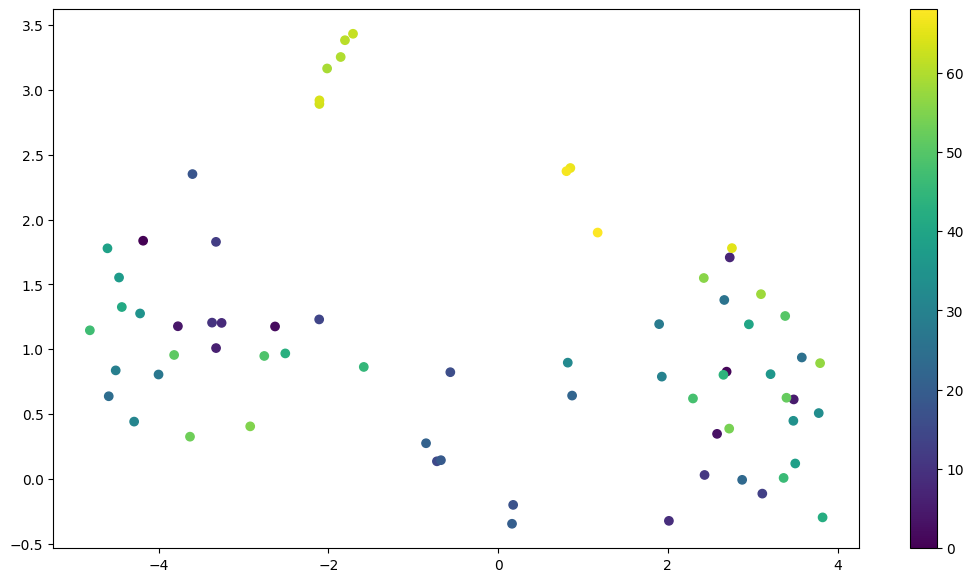

In [ ]:
# 사이킷런 라이브러리 manifold 모듈에서 TSNE 임포트
from sklearn.manifold import TSNE

# TSNE 파라미터 설정
tsne = TSNE(n_components=2, random_state=0)

# TSNS에 moderna_vecs 투입 후 적용(fit_transform)
moderna_vecs_reduced = tsne.fit_transform(moderna_vecs)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 7))

# moderna_vecs_reduced[:, 0]는 moderna_vecs_reduced의 첫번째 컬럼 값의 모든 행 데이터를 의미
# moderna_vecs_reduced[:, 1]는 moderna_vecs_reduced의 두번째 컬럼 값의 모든 행 데이터를 의미
# c는 작은 원으로 찍히는 데이터의 색상 종류 갯수로 len(ml) 개수만큼 설정
plt.scatter(moderna_vecs_reduced[:, 0], moderna_vecs_reduced[:, 1],  c=[i for i in range(len(ml))])
# 그래프 오른쪽에 컬러바를 표기
plt.colorbar()
plt.show();


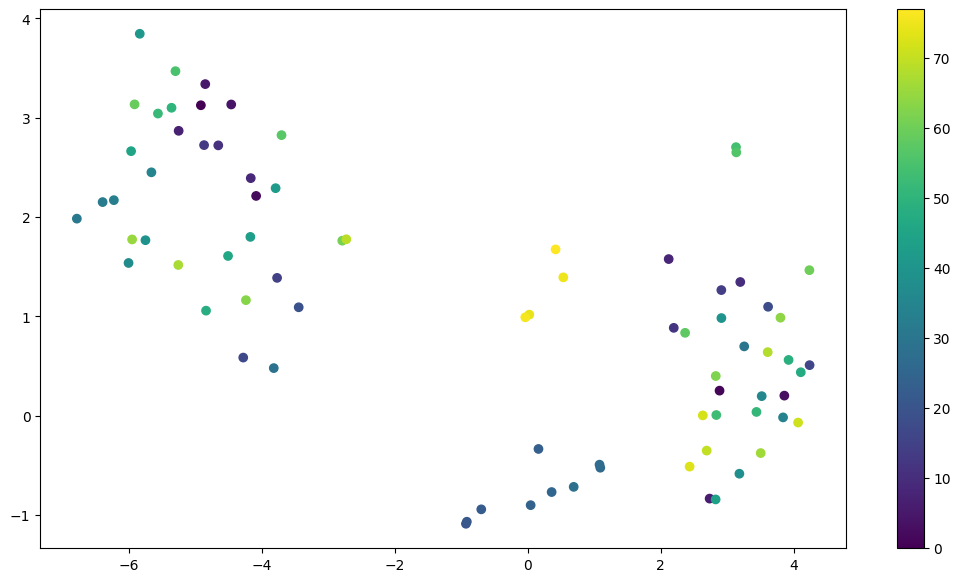

In [ ]:
# 이하 코딩 주석은 pfizer_vecs 투입을 제외하고는 위 코딩 블록과 동일
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

# TSNS에 pfizer_vecs 투입 후 적용(fit_transform)
pfizer_vecs_reduced = tsne.fit_transform(pfizer_vecs)

import matplotlib.pyplot as plt

plt.figure(figsize=(13, 7))
plt.scatter(pfizer_vecs_reduced[:, 0], pfizer_vecs_reduced[:, 1], c=[i for i in range(len(pfzl))])
plt.colorbar()
plt.show();
